In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['bank-names.txt', 'bank.csv']


#  analysis of Bank Marketing

# **Define Problem**


     The data is related with direct marketing compaigns of a
     Portuguese banking institution. The marketing compaigns are
     based on phone calls.Often More one contact to the same clent  
     were requred, in order to access if the product (bank term deposit) wou**ld be('yes') or not('no') subscribed.

# **Specify Input And Output**



**Categorical Variable :**

* Marital - (Married , Single , Divorced)",
* Job - (Management,BlueCollar,Technician,entrepreneur,retired,admin)
* Contact - (Telephone,Cellular,Unknown)
* Education - (Primary,Secondary,Tertiary,Unknown)
* Month - (Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec)
* Poutcome - (Success,Failure,Other,Unknown)
* Housing - (Yes/No)
* Loan - (Yes/No)
* [](http://)Default - (Yes/No)


**Numerical Variable:**

* Age
* Balance
* Day
* Duration
* Campaign
* Pdays
* Previous

**class**

* deposit- (Yes/No)

**Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('../input/bank.csv', delimiter= ";", header = 'infer')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Exploratory Data Analysis:

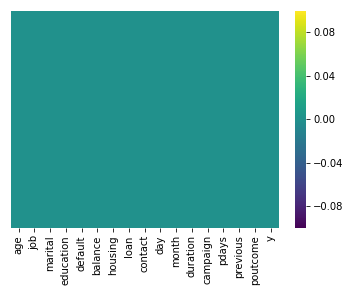

In [4]:
sns.heatmap(df.isnull(),yticklabels = False, cmap = 'viridis')

**Finding Correlation between Features and class for Selection**

**1. Using Pairplot** 

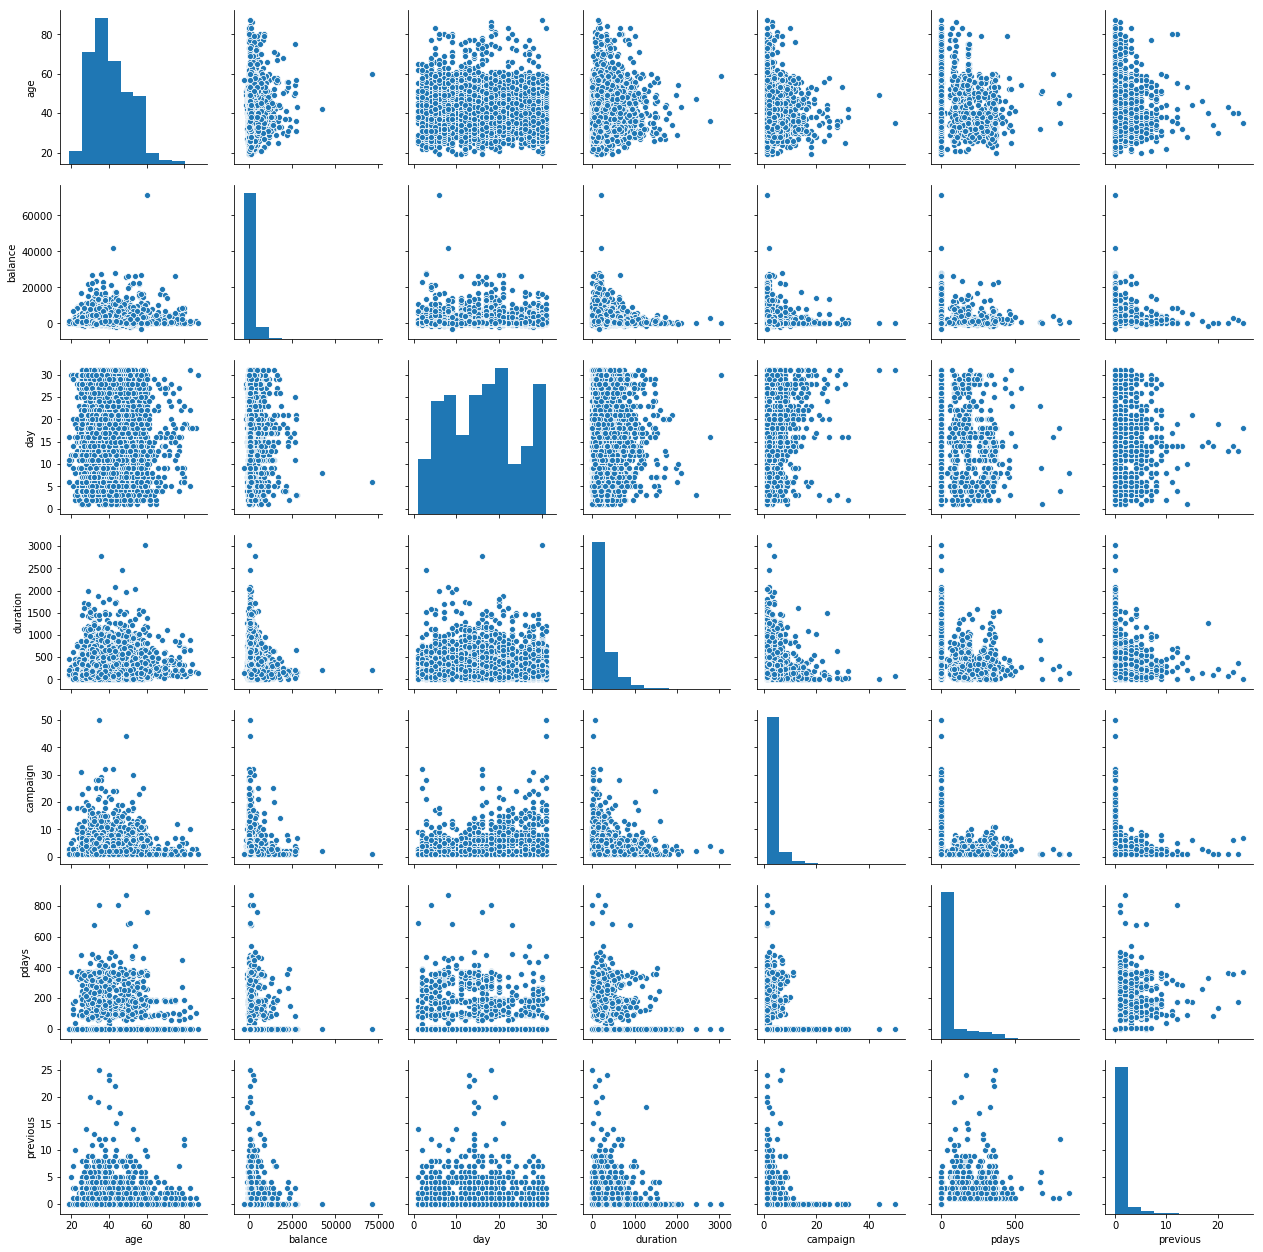

In [5]:
sns.pairplot(df)

we can observe df is an not-Symmetric, so lets find out the correlation matrix to look into details.

**2. Correlation matrix**

In [6]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


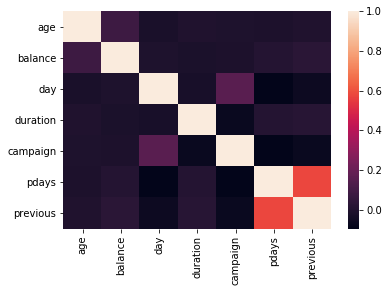

In [7]:
sns.heatmap(df.corr())

**As Per the Pairplot, correlation matrix, and heatmap, observations as folllow:**

* Data is non-linearn asymetric
* Hense selection of features will not depend upon correlaion factor.
* also not a sinngle feature is correlated completely with class, hense requires combination of features.

# Feature Selection techniques:

1. Univariate Selection(non-negative fetures)
2. Recursive Feature Elimination(RFE)
3. Principle Component Analysis(PCA)(data reduction tech)
4. Feature importance(decision tree)


**Which feature selection technique should be used for our data?**

* Contains negative values, hense univariate Selection technique cannot be used.
* PCA is data reduction technique. aim is to select best possible feature and not reduction and this is classified type of data.
* PCA is an unsupervised method, used for dimensionality reduction.
* Hense Decision tree technique and RFE can be used for Feature Selection.

**Encoding Categorical and numerical data into digits form**

In [8]:
 df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

# data preprocessing

In [9]:
df_new = pd.get_dummies(df, columns=['job', 'marital', 'education','default',
                                    'housing','loan','contact','month','poutcome'] )

In [10]:
df_new.y.replace(('yes','no'),(1,0),inplace = True)

In [11]:
df_new.dtypes

age                    int64
balance                int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
y                      int64
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
default_no             uint8
default_yes            uint8
housing_no             uint8
housing_yes            uint8
loan_no                uint8
loan_yes               uint8
contact_cellular       uint8
contact_teleph

# Exploring the Feature

In [12]:
df.education.unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

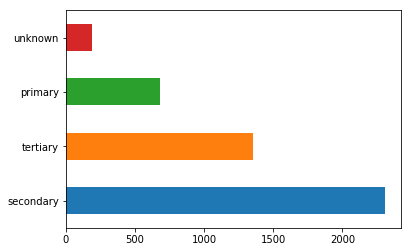

In [13]:
df.education.value_counts().plot(kind = 'barh')

In [14]:
#Feature selection

y = pd.DataFrame(df_new['y'])
X = df_new.drop(['y'],axis=1)

# Model Selection

In [15]:
# data divide on training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3, random_state = 2)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3164, 51)
(1357, 51)
(3164, 1)
(1357, 1)


# Model Selection

# 1)Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
y_pred = logmodel.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score

acc_logmodel = round(accuracy_score(y_pred, y_test) * 100)
print(acc_logmodel)

90.0


In [21]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))

print('\n')

print(classification_report(y_test, y_pred))

[[1187   22]
 [ 110   38]]


              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1209
           1       0.63      0.26      0.37       148

   micro avg       0.90      0.90      0.90      1357
   macro avg       0.77      0.62      0.66      1357
weighted avg       0.88      0.90      0.88      1357

